In [72]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
#from google.colab import drive
from scipy import stats
import numpy as np
import pickle

#Mount Google Drive

# Load the datasets
df_train = pd.read_csv('application_train.csv')
df_previous = pd.read_csv('previous_application.csv')
df_installments = pd.read_csv('installments_payments.csv')
df_credit_card = pd.read_csv('credit_card_balance.csv')

Data Exploration

In [3]:
#print(df_train.info())

# Display the first few rows of the dataset
display(df_train.head())



# Display basic statistics of the dataset
print(df_train.describe())

df_train['FLAG_OWN_CAR'] = df_train['FLAG_OWN_CAR'].replace({'N':0,'Y':1})

df_train['FLAG_OWN_REALTY'] = df_train['FLAG_OWN_REALTY'].replace({'N':0,'Y':1})



,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


          SK_ID_CURR         TARGET   CNT_CHILDREN  AMT_INCOME_TOTAL  \
count  307511.000000  307511.000000  307511.000000      3.075110e+05   
mean   278180.518577       0.080729       0.417052      1.687979e+05   
std    102790.175348       0.272419       0.722121      2.371231e+05   
min    100002.000000       0.000000       0.000000      2.565000e+04   
25%    189145.500000       0.000000       0.000000      1.125000e+05   
50%    278202.000000       0.000000       0.000000      1.471500e+05   
75%    367142.500000       0.000000       1.000000      2.025000e+05   
max    456255.000000       1.000000      19.000000      1.170000e+08   

         AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE  \
count  3.075110e+05  307499.000000     3.072330e+05   
mean   5.990260e+05   27108.573909     5.383962e+05   
std    4.024908e+05   14493.737315     3.694465e+05   
min    4.500000e+04    1615.500000     4.050000e+04   
25%    2.700000e+05   16524.000000     2.385000e+05   
50%    5.135310e+05  

C:\Users\madda\AppData\Local\Temp\ipykernel_10512\3207412515.py:11: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_train['FLAG_OWN_CAR'] = df_train['FLAG_OWN_CAR'].replace({'N':0,'Y':1})
C:\Users\madda\AppData\Local\Temp\ipykernel_10512\3207412515.py:13: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_train['FLAG_OWN_REALTY'] = df_train['FLAG_OWN_REALTY'].replace({'N':0,'Y':1})


**1. SK_ID_CURR Analysis: Get the count of unique values of SK_ID_CURR in file application_train.csv and compare this count to the number of rows in application_train.csv. Compare this with the total row count. Investigate if SK_ID_CURR serves as the table's primary key.?**

In [4]:
#1.SK_ID_CURR Analysis
unique_sk_id_count = df_train['SK_ID_CURR'].nunique()
total_rows = df_train.shape[0]

print('Unique SK_ID_CURR count:', unique_sk_id_count)
print('Total number of rows in application_train.csv:', total_rows)

Unique SK_ID_CURR count: 307511
Total number of rows in application_train.csv: 307511


**Analysis:** The total number of rows in application_train.csv is same to the total unique values of SK_ID_CURR.

**2. TARGET Column Analysis: Identify and quantify the unique values within the TARGET column. Assess the dataset's balance by evaluating the proportions of each target value.**

In [5]:
#2. TARGET Column Analysis
target_value_counts = df_train['TARGET'].value_counts()
target_value_counts

TARGET
0    282686
1     24825
Name: count, dtype: int64

In [6]:
# TARGET Column Analysis
target_value_counts = df_train['TARGET'].value_counts(normalize=True)
target_value_counts

TARGET
0    0.919271
1    0.080729
Name: proportion, dtype: float64

**Analysis:** The proportion of TARGET column suggests that 0 appears 92 times and 1 appears 8 times in count of 100.

**3. Correlation Analysis: Generate a Pearson correlation matrix and heatmap (for any 10 numeric variables of choice) on application_tain.csv. Write code to list the top 5 features correlated with the TARGET column. (Hint: df.corr())**

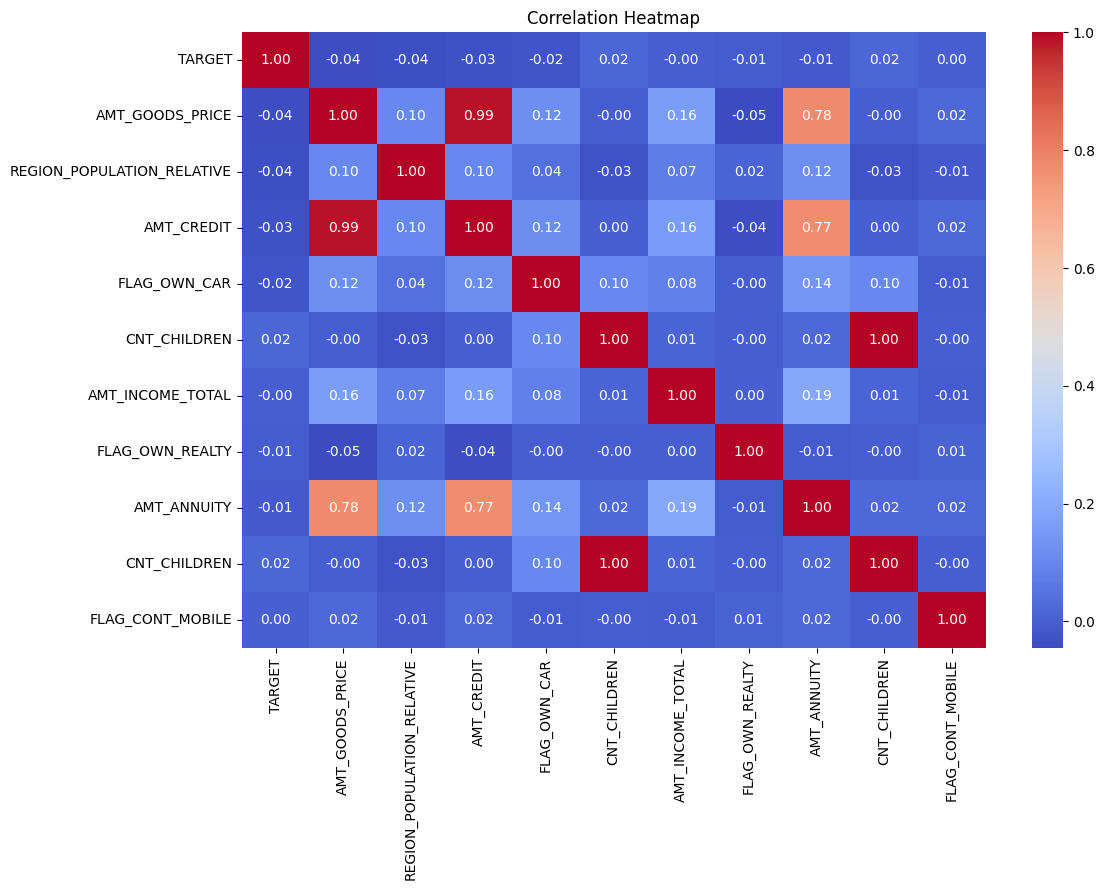

Top 5 features correlated with TARGET:
 AMT_GOODS_PRICE               0.039645
REGION_POPULATION_RELATIVE    0.037227
AMT_CREDIT                    0.030369
FLAG_OWN_CAR                  0.021851
CNT_CHILDREN                  0.019187
Name: TARGET, dtype: float64


FileNotFoundError: [Errno 2] No such file or directory: 'C:\\content\\correlation.png'

<Figure size 640x480 with 0 Axes>

In [8]:
# Select 10 numeric variables of choice (plus the 'TARGET' variable)
selected_columns = ['TARGET','AMT_GOODS_PRICE','REGION_POPULATION_RELATIVE','AMT_CREDIT','FLAG_OWN_CAR' ,'CNT_CHILDREN','AMT_INCOME_TOTAL','FLAG_OWN_REALTY','AMT_ANNUITY','CNT_CHILDREN','FLAG_CONT_MOBILE']
df_selected = df_train[selected_columns]
# Calculate Pearson correlation matrix
corr_matrix = df_selected.corr()
# Generate a heatmap for the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

# List the top 5 features most correlated with 'TARGET', ignoring the self-correlation
corr_with_target = corr_matrix["TARGET"].drop("TARGET").abs().sort_values(ascending=False)
top_5_features = corr_with_target.head(5)
print("Top 5 features correlated with TARGET:\n", top_5_features)

large_label_heatmap_path = '/content/correlation.png'
plt.savefig(large_label_heatmap_path)


In [9]:
df_train['FLAG_OWN_CAR']=df_train['FLAG_OWN_CAR'].replace({'Y':1,'N':0})
df_train['FLAG_OWN_REALTY']=df_train['FLAG_OWN_REALTY'].replace({'Y':1,'N':0})
df_train['percentage'] = df_train['AMT_CREDIT']/df_train['AMT_GOODS_PRICE']

In [10]:
# Correlation Analysis
selected_columns = df_train.select_dtypes(include=['int64', 'float64']).columns[:10]
correlation_matrix = df_train[selected_columns].corr()

In [11]:
# Top 5 features correlated with TARGET
top_5_correlated = correlation_matrix['TARGET'].abs().sort_values(ascending=False)[1:6]
print('Total rows in dataset:', total_rows)
print('\
TARGET Column Value Counts (Normalized):\
', target_value_counts)
print('\
Top 5 Features Correlated with TARGET:\
', top_5_correlated)

Total rows in dataset: 307511
TARGET Column Value Counts (Normalized): TARGET
0    0.919271
1    0.080729
Name: proportion, dtype: float64
Top 5 Features Correlated with TARGET: AMT_GOODS_PRICE               0.039645
REGION_POPULATION_RELATIVE    0.037227
AMT_CREDIT                    0.030369
FLAG_OWN_CAR                  0.021851
CNT_CHILDREN                  0.019187
Name: TARGET, dtype: float64


**4. Histogram: Generate histograms for any five numerical features in application_train.csv, and comment on whether they seem Gaussian, or have severe skews. Visualize the relationship between each of these numeric variables and the target variable.**

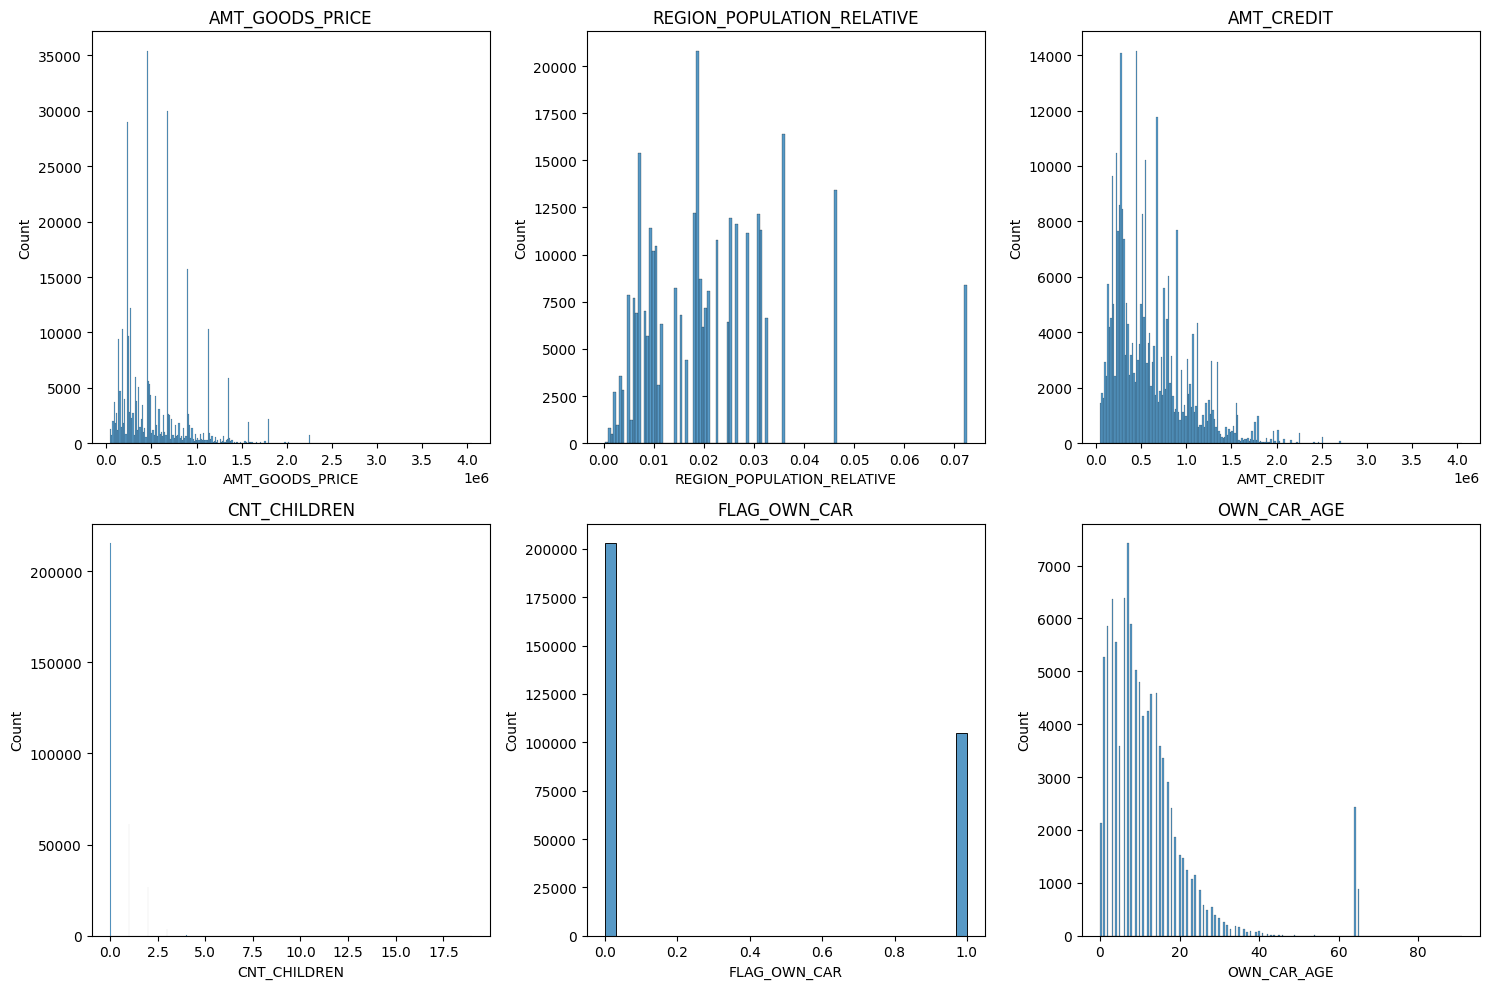

In [12]:
# Histograms
fig, axs = plt.subplots(2, 3, figsize=(15, 10))

selected_columns=['AMT_GOODS_PRICE','REGION_POPULATION_RELATIVE','AMT_CREDIT','CNT_CHILDREN','FLAG_OWN_CAR','OWN_CAR_AGE']
for i, feature in enumerate(df_train[selected_columns]):
    row = i // 3
    col = i % 3
    sns.histplot(df_train[feature], ax=axs[row, col])
    axs[row, col].set_title(feature)
plt.tight_layout()
plt.show()

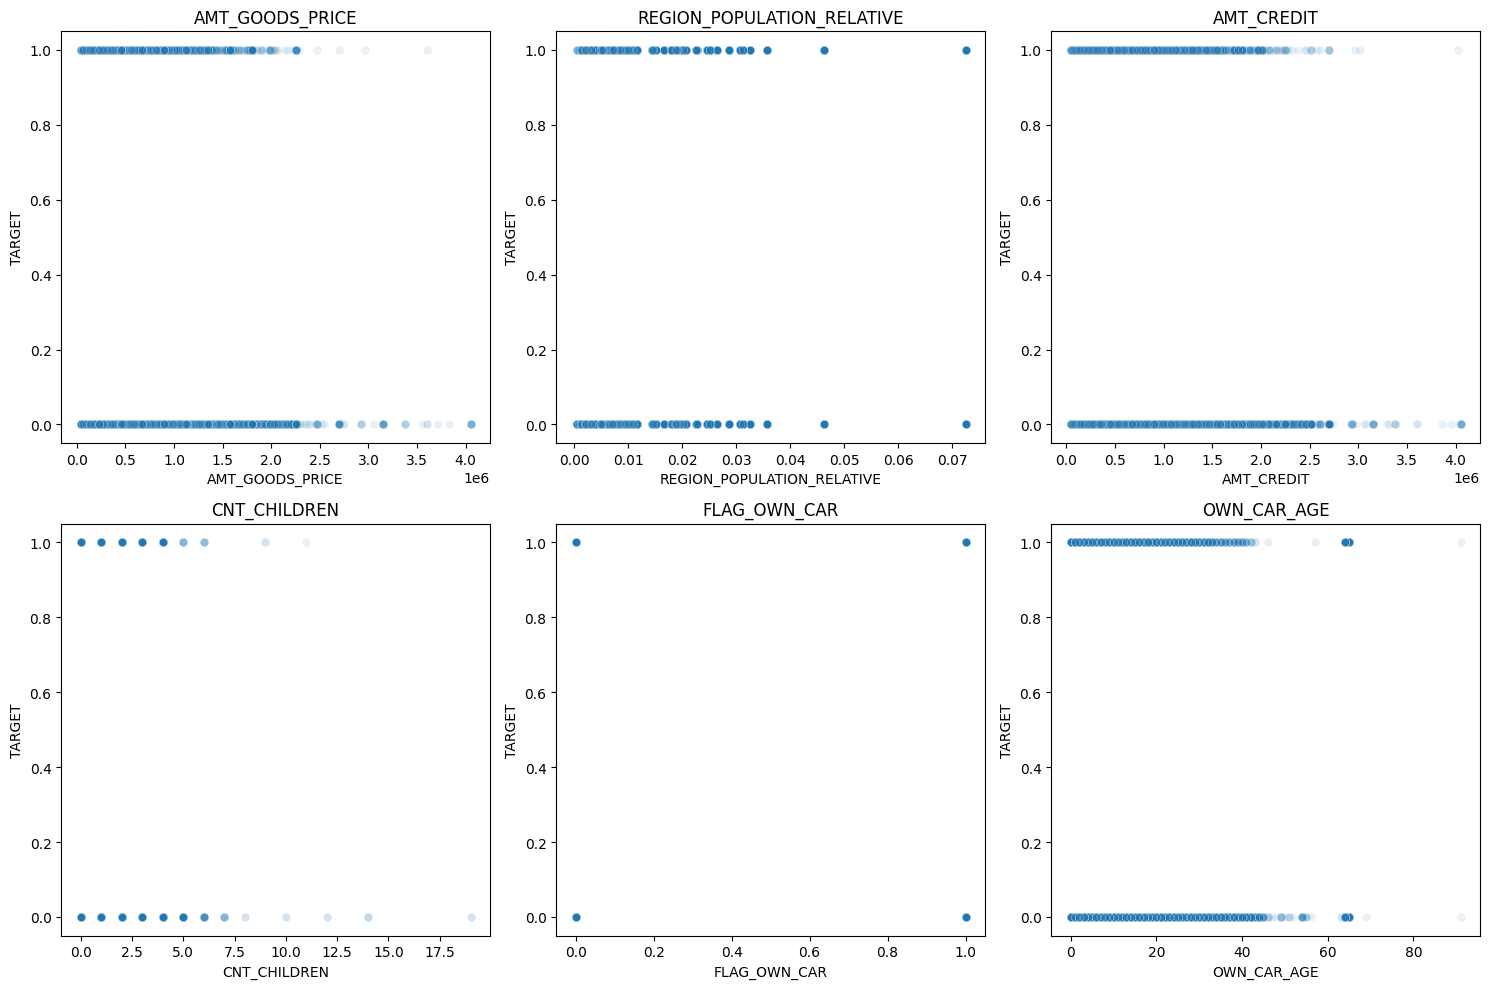

In [13]:
#Variation with target
fig, axs = plt.subplots(2, 3, figsize=(15, 10))

selected_columns=['AMT_GOODS_PRICE','REGION_POPULATION_RELATIVE','AMT_CREDIT','CNT_CHILDREN','FLAG_OWN_CAR','OWN_CAR_AGE']
for i, feature in enumerate(selected_columns):
    row = i // 3
    col = i % 3
    sns.scatterplot(x= df_train[feature],y = df_train['TARGET'],ax=axs[row, col],alpha=0.1)
    axs[row, col].set_title(feature)
plt.tight_layout()
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\content\\arge_label_heatmap.png'

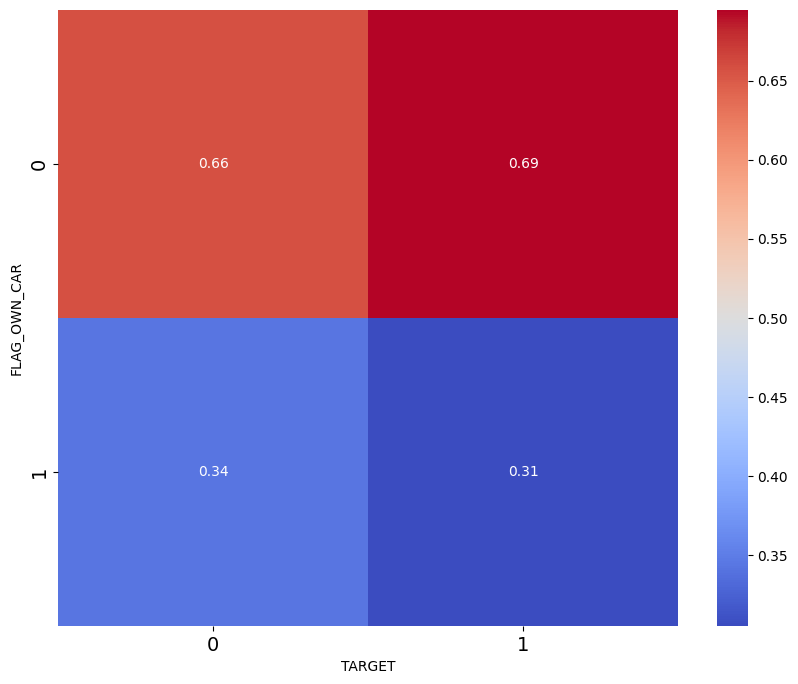

In [14]:
#Since FLAG_OWN_CAR is a categorical variable, scatter plot cannot help in visualizing its variation with target
#Below is the heatmap to show the variation with target
crosstab = pd.crosstab(df_train['FLAG_OWN_CAR'], df_train['TARGET'], normalize='columns')

plt.figure(figsize=(10, 8))
ax = sns.heatmap(crosstab, annot=True, cmap='coolwarm', fmt='.2f')

# Increase the size of the labels and ticks for better readability
ax.set_xticklabels(ax.get_xmajorticklabels(), fontsize = 14)
ax.set_yticklabels(ax.get_ymajorticklabels(), fontsize = 14)

# Save the plot to a file
large_label_heatmap_path = '/content/arge_label_heatmap.png'
plt.savefig(large_label_heatmap_path)
# Close the figure to prevent it from displaying in the output


In [15]:
from scipy import stats
import numpy as np

**5. Outlier Analysis: Perform outlier analysis on the chosen variables.**

In [16]:
# Selected numerical variables
selected_columns = ['AMT_GOODS_PRICE','REGION_POPULATION_RELATIVE','AMT_CREDIT','CNT_CHILDREN','FLAG_OWN_CAR']

z_scores = np.abs(stats.zscore(df_train[selected_columns]))
outliers_before = (z_scores > 3).sum()

print(outliers_before)

AMT_GOODS_PRICE                  0
REGION_POPULATION_RELATIVE    8412
AMT_CREDIT                    3255
CNT_CHILDREN                  4272
FLAG_OWN_CAR                     0
dtype: int64


**6. Transformation of Numeric Variables: If skewed, perform suitable transformations on these five numerical variables. Check the relationship of each of these numeric variables with the target variable using bar charts.  Visualize the relationship between each of these numeric variables and the target variable. Perform outlier analysis on the transformed variables and report any differences before and after transformation.**

In [17]:
# Transformation of  Variables
selected_columns = ['AMT_GOODS_PRICE','REGION_POPULATION_RELATIVE','AMT_CREDIT','CNT_CHILDREN','OWN_CAR_AGE']
transformed_columns = {}
for column in selected_columns:
    # Applying log transformation to positive values
    positive_values = df_train[column] - df_train[column].min() + 1 # Shifting values to positive
    transformed_columns[column] = np.log(positive_values)
transformed_columns = pd.DataFrame(transformed_columns)

In [18]:
# Outliers after performing transformation
selected_columns = ['AMT_GOODS_PRICE','REGION_POPULATION_RELATIVE','AMT_CREDIT','CNT_CHILDREN','OWN_CAR_AGE']

z_scores = np.abs(stats.zscore(transformed_columns[selected_columns]))
outliers_after = (z_scores > 3).sum()

print(outliers_after)
new_column_names = [col + '_transformed' for col in selected_columns]
print(new_column_names)

for old_col, new_col in zip(selected_columns, new_column_names):
    df_train[new_col] = transformed_columns[old_col]

df_train.to_csv('updated_dataset.csv', index=False)
from google.colab import files  # For Google Colab
files.download('updated_dataset.csv')

AMT_GOODS_PRICE                  0
REGION_POPULATION_RELATIVE    8412
AMT_CREDIT                    2187
CNT_CHILDREN                   555
OWN_CAR_AGE                      0
dtype: int64
['AMT_GOODS_PRICE_transformed', 'REGION_POPULATION_RELATIVE_transformed', 'AMT_CREDIT_transformed', 'CNT_CHILDREN_transformed', 'OWN_CAR_AGE_transformed']


ModuleNotFoundError: No module named 'google'

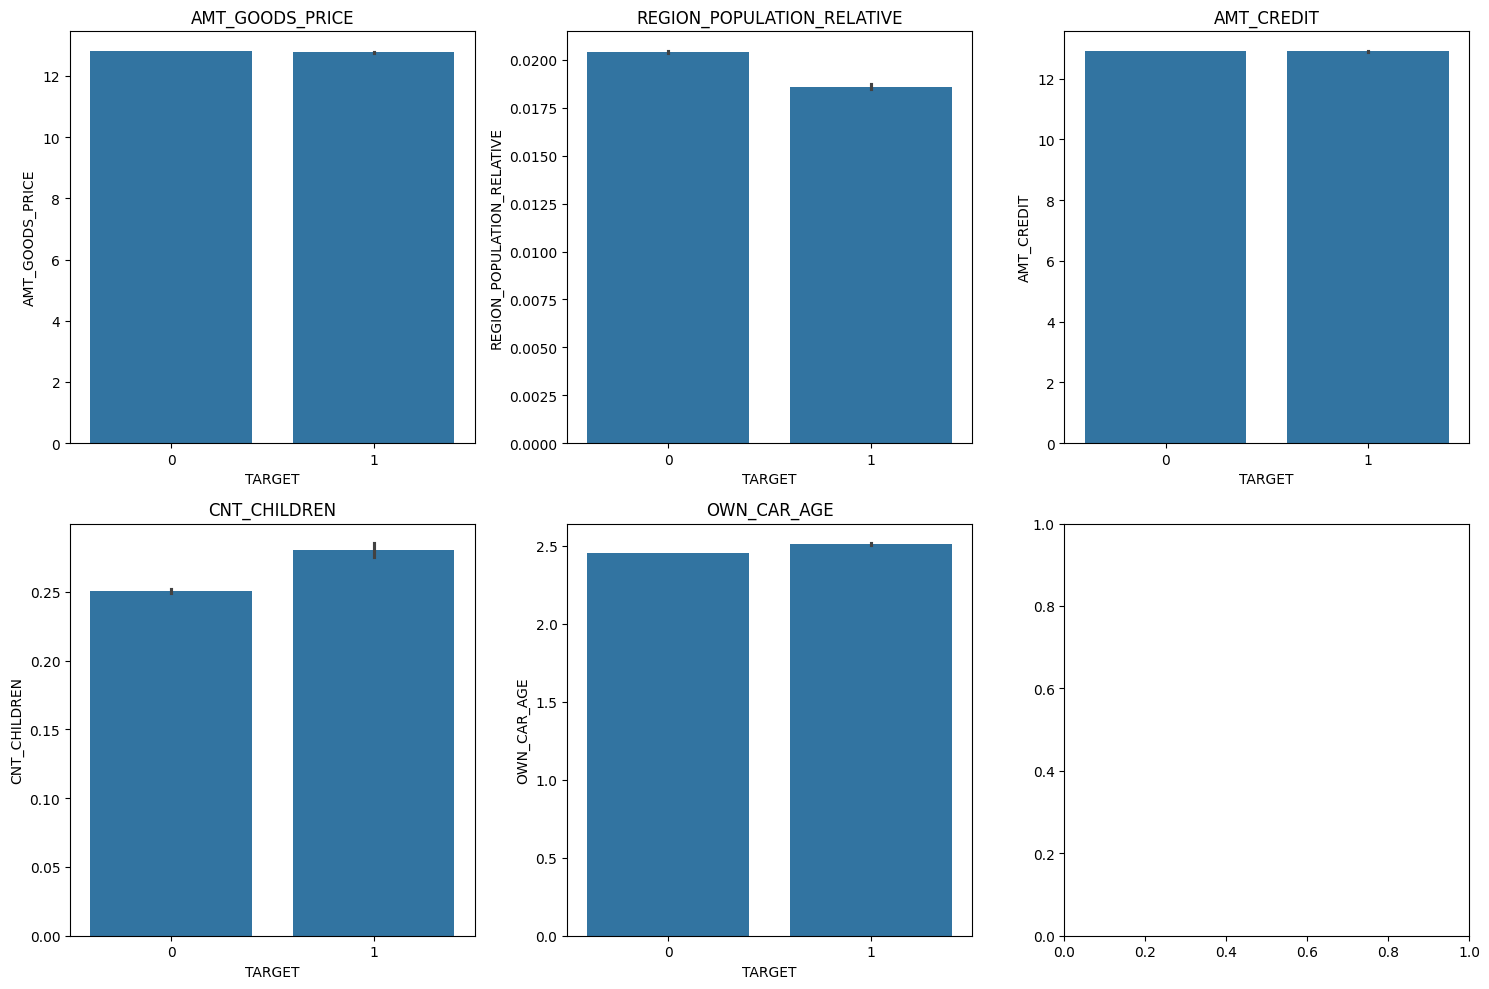

In [ ]:
# Visualizing the relationship between numeric variables and the target variable
fig, axs = plt.subplots(2, 3, figsize=(15, 10))
for i, column in enumerate(transformed_columns.columns):
    row = i // 3
    col = i % 3
    sns.barplot(x='TARGET', y=transformed_columns[column], data=df_train, ax=axs[row, col])
    axs[row, col].set_title(column)
plt.tight_layout()
plt.show()

**7. Categorical Features: Check cardinality and rare values of at least five categorical features. Discuss whether each of them is ordinal or nominal. Discuss the suitable methods for encoding each of them.**

In [ ]:
#Finding categorical variables which are
import pandas as pd
from scipy.stats import chi2_contingency
import numpy as np


def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2_corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    r_corr = r - ((r-1)**2)/(n-1)
    k_corr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2_corr / min((k_corr-1), (r_corr-1)))



categorical_cols = df_train.select_dtypes(include=['object', 'bool', 'category']).columns

if 'TARGET' not in categorical_cols:
    categorical_cols = categorical_cols.union(pd.Index(['TARGET']))

target_correlation_dict = {}


for col in categorical_cols:
    if col != 'TARGET':
        target_correlation_dict[col] = cramers_v(df_train[col], df_train['TARGET'])

top_5_correlated_with_target = sorted(target_correlation_dict.items(), key=lambda item: item[1], reverse=True)[:5]
top_5_correlated_with_target

[('OCCUPATION_TYPE', 0.08102031706400516),
 ('ORGANIZATION_TYPE', 0.0710476760322837),
 ('NAME_INCOME_TYPE', 0.06366656666297223),
 ('NAME_EDUCATION_TYPE', 0.05745780099654928),
 ('CODE_GENDER', 0.05466115724133882)]

In [ ]:
# Categorical Features Analysis
# Selecting five categorical features
categorical_columns = ['OCCUPATION_TYPE', 'ORGANIZATION_TYPE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'CODE_GENDER']

# Cardinality
cardinality = {column: df_train[column].nunique() for column in categorical_columns}

# Rare Values and Rare Value Percentages
rare_values = {}
rare_value_percentages = {}
for column in categorical_columns:
    value_counts = df_train[column].value_counts(normalize=True)
    rare_value_count = value_counts[value_counts < 0.01].count()  # Count of rare values
    rare_values[column] = rare_value_count
    rare_value_percentages[column] = (rare_value_count / len(value_counts)) * 100  # Percentage of rare values

# Creating a DataFrame to display the results
results_df = pd.DataFrame({
    'Feature': categorical_columns,
    'Cardinality': cardinality.values(),
    'Rare Value Count': rare_values.values()
})

results_df

,Feature,Cardinality,Rare Value Count
0,OCCUPATION_TYPE,18,6
1,ORGANIZATION_TYPE,58,41
2,NAME_INCOME_TYPE,8,4
3,NAME_EDUCATION_TYPE,5,1
4,CODE_GENDER,3,1


In [20]:
data = df_train

# Function to handle the specified transformations and drop the original column
def handle_transformations_and_drop(data, attribute, total_values, rare_value_count):
    # Identifying values to be considered as rare
    value_counts = data[attribute].value_counts()
    rare_values = value_counts.tail(rare_value_count).index.tolist()

    # Updating the dataframe to club rare values into 'Other'
    data[attribute] = data[attribute].apply(lambda x: 'Other' if x in rare_values else x)

    # Creating binary columns for each unique value (excluding 'Other')
    unique_values = [value for value in data[attribute].unique() if value != 'Other']
    for value in unique_values:
        data[f"{attribute}_{value}"] = (data[attribute] == value).astype(int)

    # Drop the original column

    return data

# Attributes and their specifics (Attribute, Total Unique Values, Rare Value Count)
attributes_info = [
    ('OCCUPATION_TYPE', 18, 6),
    ('ORGANIZATION_TYPE', 58, 41),
    ('NAME_INCOME_TYPE', 8, 4),
    ('NAME_EDUCATION_TYPE', 5, 1),
    ('CODE_GENDER', 3, 1)
]

# Apply transformations for each attribute and drop the original columns
for attribute, total_values, rare_value_count in attributes_info:
    data = handle_transformations_and_drop(data, attribute, total_values, rare_value_count)

In [21]:
data.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'NAME_INCOME_TYPE_Working', 'NAME_INCOME_TYPE_State servant',
       'NAME_INCOME_TYPE_Commercial associate', 'NAME_INCOME_TYPE_Pensioner',
       'NAME_EDUCATION_TYPE_Secondary / secondary special',
       'NAME_EDUCATION_TYPE_Higher education',
       'NAME_EDUCATION_TYPE_Incomplete higher',
       'NAME_EDUCATION_TYPE_Lower secondary', 'CODE_GENDER_M',
       'CODE_GENDER_F'],
      dtype='object', length=167)

In [22]:
df_train=data

**9. Feature Engineering: Utilize previous_application.csv to compute and integrate the count of previous applications per SK_ID_CURR into application_train.csv. Further, create at least five new features from additional files, justifying their selection and aggregation method.**

In [23]:
# FEATURE 0 : Compute the count of previous applications per SK_ID_CURR
prev_applications_count = df_previous.groupby('SK_ID_CURR')['SK_ID_PREV'].count().reset_index()
prev_applications_count.columns = ['SK_ID_CURR', 'PREV_APPS_COUNT']

df_train = df_train.merge(prev_applications_count, on='SK_ID_CURR', how='left')

df_train['PREV_APPS_COUNT'] = df_train['PREV_APPS_COUNT']

print(df_train[['SK_ID_CURR', 'PREV_APPS_COUNT']].head())

   SK_ID_CURR  PREV_APPS_COUNT
0      100002              1.0
1      100003              3.0
2      100004              1.0
3      100006              9.0
4      100007              6.0


In [24]:
# FEATURE 1: Percentage of Un-Approved Applications

unapproved = df_previous[df_previous['NAME_CONTRACT_STATUS']!='Approved'].groupby('SK_ID_CURR').count()['NAME_CONTRACT_TYPE']

total = df_previous.groupby('SK_ID_CURR').count()['SK_ID_PREV']

merged_df = pd.merge(unapproved, total, left_index=True, right_index=True,how='right').fillna(0)
merged_df['Unapproved%'] = merged_df['NAME_CONTRACT_TYPE']*100/merged_df['SK_ID_PREV']
merged_df.drop(['NAME_CONTRACT_TYPE','SK_ID_PREV'],axis=1,inplace=True)
merged_df=merged_df.reset_index()
df_train = pd.merge(df_train,merged_df,on='SK_ID_CURR',how='left')

In [25]:
# FEATURE 2: Annuity/Income ratio

df_train['Annuity/Income'] = df_train['AMT_ANNUITY']/(df_train['AMT_INCOME_TOTAL']/12)

In [26]:
# FEATURE 3: Number of late installments
df_installments['Ontime'] = (df_installments['DAYS_INSTALMENT']>=df_installments['DAYS_ENTRY_PAYMENT']).astype(int)
on_time = df_installments.groupby('SK_ID_CURR').sum()['Ontime']
total = df_installments.groupby('SK_ID_CURR').count()['SK_ID_PREV']
merged_df = pd.merge(on_time, total, left_index=True, right_index=True,how='right').fillna(0)
merged_df['ontime payment%'] = merged_df['Ontime']*100/merged_df['SK_ID_PREV']
merged_df.drop(['Ontime','SK_ID_PREV'],axis=1,inplace=True)
merged_df=merged_df.reset_index()
df_train = pd.merge(df_train,merged_df,on='SK_ID_CURR',how='left')

In [27]:
df_train.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'NAME_EDUCATION_TYPE_Secondary / secondary special',
       'NAME_EDUCATION_TYPE_Higher education',
       'NAME_EDUCATION_TYPE_Incomplete higher',
       'NAME_EDUCATION_TYPE_Lower secondary', 'CODE_GENDER_M', 'CODE_GENDER_F',
       'PREV_APPS_COUNT', 'Unapproved%', 'Annuity/Income', 'ontime payment%'],
      dtype='object', length=171)

In [28]:
# FEATURE 4: Down Payment to Goods Price Ratio
df_previous_grouped = df_previous.groupby('SK_ID_CURR').sum()[['AMT_DOWN_PAYMENT','AMT_GOODS_PRICE']]
df_previous_grouped['%Down payment'] = df_previous_grouped['AMT_DOWN_PAYMENT']/df_previous_grouped['AMT_GOODS_PRICE']
df_previous_grouped['%Down payment'] = df_previous_grouped['%Down payment'].fillna(0)

df_previous_grouped.drop(['AMT_DOWN_PAYMENT', 'AMT_GOODS_PRICE'],axis=1)
df_previous_grouped = df_previous_grouped.reset_index()
df_train = pd.merge(df_train,df_previous_grouped,on='SK_ID_CURR',how='left')


In [29]:
df_train.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'NAME_EDUCATION_TYPE_Lower secondary', 'CODE_GENDER_M', 'CODE_GENDER_F',
       'PREV_APPS_COUNT', 'Unapproved%', 'Annuity/Income', 'ontime payment%',
       'AMT_DOWN_PAYMENT', 'AMT_GOODS_PRICE_y', '%Down payment'],
      dtype='object', length=174)

In [30]:
# FEATURE 5: Total credit card bill overdue days
merged_df  = df_credit_card.groupby('SK_ID_CURR').sum()['SK_DPD_DEF'].reset_index()
merged_df.columns =['SK_ID_CURR','Credit bill overdue days']
df_train = pd.merge(df_train,merged_df,on='SK_ID_CURR',how='left')

In [31]:
df_train.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'CODE_GENDER_M', 'CODE_GENDER_F', 'PREV_APPS_COUNT', 'Unapproved%',
       'Annuity/Income', 'ontime payment%', 'AMT_DOWN_PAYMENT',
       'AMT_GOODS_PRICE_y', '%Down payment', 'Credit bill overdue days'],
      dtype='object', length=175)

**10. NaN Handling. Document your strategy for managing NaN values, providing rationale for your chosen approach.**

In [34]:
#Null Value Handling using the features which are important

#Numeric
numeric_features = ['AMT_GOODS_PRICE_x','REGION_POPULATION_RELATIVE','AMT_CREDIT','CNT_CHILDREN','OWN_CAR_AGE']

#Categorical
categorical_features = ['OCCUPATION_TYPE', 'ORGANIZATION_TYPE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'CODE_GENDER']

#Created features

created_features = ['PREV_APPS_COUNT','Unapproved%', 'Annuity/Income', 'ontime payment%', '%Down payment','Credit bill overdue days']


features = numeric_features+categorical_features+created_features


In [35]:
df_train[features].isnull().sum()

AMT_GOODS_PRICE_x                278
REGION_POPULATION_RELATIVE         0
AMT_CREDIT                         0
CNT_CHILDREN                       0
OWN_CAR_AGE                   202929
OCCUPATION_TYPE                96391
ORGANIZATION_TYPE                  0
NAME_INCOME_TYPE                   0
NAME_EDUCATION_TYPE                0
CODE_GENDER                        0
PREV_APPS_COUNT                16454
Unapproved%                    16454
Annuity/Income                    12
ontime payment%                15868
%Down payment                  16454
Credit bill overdue days      220606
dtype: int64

In [36]:
df_train.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'CODE_GENDER_M', 'CODE_GENDER_F', 'PREV_APPS_COUNT', 'Unapproved%',
       'Annuity/Income', 'ontime payment%', 'AMT_DOWN_PAYMENT',
       'AMT_GOODS_PRICE_y', '%Down payment', 'Credit bill overdue days'],
      dtype='object', length=175)

In [37]:
# AMT_GOODS_PRICE
df_train['AMT_GOODS_PRICE_x'].fillna(df_train['AMT_CREDIT'], inplace=True)


C:\Users\madda\AppData\Local\Temp\ipykernel_10512\886821685.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_train['AMT_GOODS_PRICE_x'].fillna(df_train['AMT_CREDIT'], inplace=True)


In [38]:
# OWN_CAR_AGE
df_train['OWN_CAR_AGE'] = np.where(
    df_train['FLAG_OWN_CAR'] == 'N',
    0,
    df_train['OWN_CAR_AGE']
)
df_train['OWN_CAR_AGE'].fillna(df_train['OWN_CAR_AGE'].mean(), inplace=True)

C:\Users\madda\AppData\Local\Temp\ipykernel_10512\3554536018.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_train['OWN_CAR_AGE'].fillna(df_train['OWN_CAR_AGE'].mean(), inplace=True)


In [39]:
# OCCUPATION_TYPE
mode_occupation = df_train['OCCUPATION_TYPE'].mode()[0]
df_train['OCCUPATION_TYPE_IS_NULL'] = df_train['OCCUPATION_TYPE'].isnull().astype(int)
df_train['OCCUPATION_TYPE'].fillna(mode_occupation, inplace=True)


C:\Users\madda\AppData\Local\Temp\ipykernel_10512\3736028454.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_train['OCCUPATION_TYPE'].fillna(mode_occupation, inplace=True)


In [40]:
#Count of previous application
df_train['PREV_APPS_COUNT'].fillna(0, inplace=True)

C:\Users\madda\AppData\Local\Temp\ipykernel_10512\2214077149.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_train['PREV_APPS_COUNT'].fillna(0, inplace=True)


In [41]:
# %Unapproved loan applications
df_train['Unapproved%'].fillna(df_train['Unapproved%'].mean(), inplace=True)

C:\Users\madda\AppData\Local\Temp\ipykernel_10512\3641682613.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_train['Unapproved%'].fillna(df_train['Unapproved%'].mean(), inplace=True)


In [42]:
# Annuity/Income ratio handling
df_train['Annuity/Income'].fillna(df_train['Annuity/Income'].mean(), inplace=True)

C:\Users\madda\AppData\Local\Temp\ipykernel_10512\2745004387.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_train['Annuity/Income'].fillna(df_train['Annuity/Income'].mean(), inplace=True)


In [43]:
# %On-time payments handling
df_train['ontime payment%'].fillna(df_train['ontime payment%'].mean(), inplace=True)

C:\Users\madda\AppData\Local\Temp\ipykernel_10512\1531432300.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_train['ontime payment%'].fillna(df_train['ontime payment%'].mean(), inplace=True)


In [44]:
# % Down payment handling

df_train['%Down payment'].fillna(df_train['%Down payment'].mean(), inplace=True)

C:\Users\madda\AppData\Local\Temp\ipykernel_10512\1362415713.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_train['%Down payment'].fillna(df_train['%Down payment'].mean(), inplace=True)


In [45]:
# Credit bill overdue days handling
df_train['Credit bill overdue days'].fillna(0, inplace=True)

C:\Users\madda\AppData\Local\Temp\ipykernel_10512\3734947076.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_train['Credit bill overdue days'].fillna(0, inplace=True)


In [46]:
df_train[features].isnull().sum()

AMT_GOODS_PRICE_x             0
REGION_POPULATION_RELATIVE    0
AMT_CREDIT                    0
CNT_CHILDREN                  0
OWN_CAR_AGE                   0
OCCUPATION_TYPE               0
ORGANIZATION_TYPE             0
NAME_INCOME_TYPE              0
NAME_EDUCATION_TYPE           0
CODE_GENDER                   0
PREV_APPS_COUNT               0
Unapproved%                   0
Annuity/Income                0
ontime payment%               0
%Down payment                 0
Credit bill overdue days      0
dtype: int64

In [47]:
df_train.to_csv('dataset.csv', index=False)

**Final Project**

In [48]:
pd.read_csv('dataset.csv')

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,CODE_GENDER_F,PREV_APPS_COUNT,Unapproved%,Annuity/Income,ontime payment%,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE_y,%Down payment,Credit bill overdue days,OCCUPATION_TYPE_IS_NULL
0,100002,1,Cash loans,M,0,1,0,202500.0,406597.5,24700.5,...,0,1.0,0.000000,1.463733,100.000000,0.00,179055.00,0.000000,0.0,0
1,100003,0,Cash loans,F,0,0,0,270000.0,1293502.5,35698.5,...,1,3.0,0.000000,1.586600,100.000000,6885.00,1306309.50,0.005271,0.0,0
2,100004,0,Revolving loans,M,1,1,0,67500.0,135000.0,6750.0,...,0,1.0,0.000000,1.200000,100.000000,4860.00,24282.00,0.200148,0.0,0
3,100006,0,Cash loans,F,0,1,0,135000.0,312682.5,29686.5,...,1,9.0,44.444444,2.638800,100.000000,69680.34,2449829.34,0.028443,0.0,0
4,100007,0,Cash loans,M,0,1,0,121500.0,513000.0,21865.5,...,0,6.0,0.000000,2.159556,75.757576,6781.50,903181.50,0.007508,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,0,0,0,157500.0,254700.0,27558.0,...,0,1.0,0.000000,2.099657,100.000000,0.00,40455.00,0.000000,0.0,0
307507,456252,0,Cash loans,F,0,1,0,72000.0,269550.0,12001.5,...,1,1.0,0.000000,2.000250,83.333333,3456.00,57595.50,0.060005,0.0,1
307508,456253,0,Cash loans,F,0,1,0,153000.0,677664.0,29979.0,...,1,2.0,0.000000,2.351294,92.857143,8806.50,48325.50,0.182233,0.0,0
307509,456254,1,Cash loans,F,0,1,0,171000.0,370107.0,20205.0,...,1,2.0,0.000000,1.417895,100.000000,0.00,242635.50,0.000000,0.0,0


In [49]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import make_scorer, recall_score, precision_score, f1_score

**1. Identify which type of machine learning problem is it?**

It is an supervised machine learning problem as we are trying to predict the target based on existing data. This is a binary classification problem where we are predicting a binary outcome—whether a loan will be repaid or not

**2. Please suggest models that the team may consider for the problem at hand. Suggest at least three models and discuss their pros and cons.**

a. Logistic Regression

Pros:

Simple to implement and interpret.
Efficient to train, which can be beneficial when working with large datasets.
Provides probabilities for outcomes, which can be useful for gaining insights into the certainty of predictions.

Cons:

Assumes a linear relationship between the independent variables and the logarithm of odds (log-odds).
Performance might be limited in complexity (non-linear relationships).

b. Random Forest

Pros:

Handles high-dimensional spaces and large numbers of training examples well.
Less likely to overfit than decision trees.
Can handle both numerical and categorical data and does not assume feature independence.

Cons:

More complex and computationally intensive than logistic regression.
Model interpretation is not as straightforward, although feature importances can give some insights.

c. Decision Tree

Pros:

Easy to visualize and interpret, suitable for explaining to non-technical stakeholders.
Can capture complex, non-linear relationships.
Does not require scaling or normalization of features.
Handles missing values by assigning surrogate splits.
Provides feature importance insights.

Cons:

Can easily overfit the training data, especially if not pruned.
Sensitive to small data changes, leading to instability in results.
May show bias towards dominant classes in imbalanced datasets.
Limited to axis-aligned splits, reducing generalization.
Computationally expensive for deep trees.

**3. Use the train dataset along with the five new variables you engineered during the EDA**

In [50]:
data = pd.read_csv('dataset.csv')
data = data.dropna(subset=['TARGET'])

**4. Identify the data preparation steps required.**

OneHotEncoding: Steps like OneHotEncoding is already performed for mid term in this data set

Duplicate columns: One step that can be performed here is to check presence of duplicate columns as we did multiple joins

Missing Values: We removed nulls in the features we generated in the mid term. We can remove null values in other columns now

Scaling: Standardize or normalize numerical data as needed.

In [51]:
def find_duplicate_columns(df):
    duplicate_columns = []
    columns = df.columns

    for i in range(len(columns)):
        for j in range(i + 1, len(columns)):
            col1 = columns[i]
            col2 = columns[j]
            if df[col1].equals(df[col2]):
                duplicate_columns.append((col1, col2))

    return duplicate_columns

# Use the function on your dataset
duplicate_cols = find_duplicate_columns(data)
print(f"Duplicate columns: {duplicate_cols}")

Duplicate columns: []


In [52]:
data.isnull().sum()[data.isnull().sum()>0]

AMT_ANNUITY                        12
NAME_TYPE_SUITE                  1292
CNT_FAM_MEMBERS                     2
EXT_SOURCE_1                   173378
EXT_SOURCE_2                      660
                                ...  
percentage                        278
AMT_GOODS_PRICE_transformed       278
OWN_CAR_AGE_transformed        202929
AMT_DOWN_PAYMENT                16454
AMT_GOODS_PRICE_y               16454
Length: 69, dtype: int64


**5. Set up preprocessor and estimators using column transformers and pipeline.  While setting up preprocessing make your pipeline robust so that if a new category shows up in future, the pipeline does not break. You must also explicitly state whether you want to the model to impute missing values at the time of inference. If yes, set up your pipelines to handle them.**

In [54]:
numerical_features = list(data.select_dtypes(include=['int64', 'float64']).columns)
categorical_features = list(data.select_dtypes(include=['object', 'category']).columns)
numerical_features = [col for col in numerical_features if col != 'TARGET']

In [55]:
numerical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

# Combine the preprocessing pipelines
preprocessor = ColumnTransformer([
    ('num', numerical_pipeline, numerical_features),
    ('cat', categorical_pipeline, categorical_features)
])

**6. Choose three estimators to run. Set up relevant parameters and perform GridSearch CV for hyperparameter tuning.**

In [56]:
target_column = 'TARGET'
X = data.drop(columns=[target_column])
y = data[target_column]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])


model_pipeline.fit(X_train, y_train)

y_pred = model_pipeline.predict(X_test)

recall_score = recall_score(y_test, y_pred)


In [61]:
recall_score

0.0010103051121438675

**Random forest with hyper parameters**

In [62]:
pipeline = Pipeline(steps=[('preprocessor', preprocessor)])


param_grid_rf = {
    'classifier__n_estimators': [100, 200],
    'classifier__max_depth': [None, 10, 20],
    'classifier__min_samples_leaf': [1, 4]
}


recall_scorer = make_scorer(recall_score)

rf_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('classifier', RandomForestClassifier(random_state=42))])
grid_rf = GridSearchCV(rf_pipeline, param_grid_rf, verbose=1, cv=3, scoring='recall')
grid_rf.fit(X_train, y_train)


print("Best parameters for Random Forest:", grid_rf.best_params_, "with score:", grid_rf.best_score_)


Fitting 3 folds for each of 12 candidates, totalling 36 fits
Best parameters for Random Forest: {'classifier__max_depth': None, 'classifier__min_samples_leaf': 1, 'classifier__n_estimators': 100} with score: 0.0007043873287430686


**Logistic regression with hyper parameters**

In [64]:
param_grid_logreg = {
    'classifier__C': [0.01, 0.1, 1, 10, 100],
    'classifier__penalty': ['l2']
}

log_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=2000))  # Temporary placeholder
])

grid_logreg = GridSearchCV(log_pipeline, param_grid_logreg, verbose=1, cv=3, scoring='recall')
grid_logreg.fit(X_train, y_train)
print("Best parameters for Logistic Regression:", grid_logreg.best_params_)
print("Best score for Logistic Regression:", grid_logreg.best_score_)

Fitting 3 folds for each of 5 candidates, totalling 15 fits
Best parameters for Logistic Regression: {'classifier__C': 1, 'classifier__penalty': 'l2'}
Best score for Logistic Regression: 0.01695502565650468


**Decision tree with hyper parameters**

In [65]:
from sklearn.tree import DecisionTreeClassifier
param_grid_tree = {
    'classifier__max_depth': [None, 10, 20, 30],
    'classifier__min_samples_leaf': [1, 2, 4]
}

tree_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier(max_depth=10, min_samples_leaf=2))
])
grid_tree = GridSearchCV(tree_pipeline, param_grid_tree, verbose=1, cv=3, scoring='recall')
grid_tree.fit(X_train, y_train)
print("Best parameters for Decision Tree:", grid_tree.best_params_)
print("Best score for Decision Tree:", grid_tree.best_score_)

Fitting 3 folds for each of 12 candidates, totalling 36 fits
Best parameters for Decision Tree: {'classifier__max_depth': None, 'classifier__min_samples_leaf': 1}
Best score for Decision Tree: 0.17156360212389918


**7. Suggest the metric(s) your team wants to use to compare the models. Justify your logic based on business goals.If needed, define your own cost function and pass it under "scoring" parameter in GridsearchCV().**


In the context of predicting loan repayment, prioritizing recall is essential because:

Minimizing Financial Risk:

A high recall ensures that most actual defaulters are flagged by the system.
By catching a larger number of potential defaulters, banks and financial institutions can mitigate the significant financial loss incurred from unpaid loans.
Conservative Risk Management:

With high recall, even if some false positives (Type I errors) occur, those applicants can undergo additional verification or receive smaller loans to minimize the overall risk.
In cases where false negatives (Type II errors) lead to more significant losses due to large defaulted loans, prioritizing recall ensures that the institution isn't caught unprepared.
Business Reputation:

Identifying defaulters in advance reduces non-performing assets (NPA) rates, leading to improved credit quality.
Maintaining a low default rate improves the company's reputation and market stability.

**8. Report the best set of parameter values for each of the three above.**

Best parameters for Random Forest: {'classifier__max_depth': None, 'classifier__min_samples_leaf': 1, 'classifier__n_estimators': 100} with recall score: 0.0007043873287430686


Best parameters for Logistic Regression: {'classifier__C': 1, 'classifier__penalty': 'l2'}
Best recall score for Logistic Regression: 0.01695502565650468


Best parameters for Decision Tree: {'classifier__max_depth': None, 'classifier__min_samples_leaf': 1}
Best recall score for Decision Tree: 0.17156360212389918

Decision tree is giving highest recall

**8. Report the models' validation performance. Also, report the performance of the three models on the test data.**

In [67]:
y_pred_logreg = grid_logreg.best_estimator_.predict(X_test)
y_pred_tree = grid_tree.best_estimator_.predict(X_test)
y_pred_rf = grid_rf.best_estimator_.predict(X_test)

In [68]:

models = {
    'Logistic Regression': (grid_logreg.best_estimator_, y_pred_logreg),
    'Decision Tree Classifier': (grid_tree.best_estimator_, y_pred_tree),
    'Random Forest Classifier': (grid_rf.best_estimator_, y_pred_rf)
}

for model_name, (model, y_pred) in models.items():
    print(f"Classification Report for {model_name}:")
    print(classification_report(y_test, y_pred))

Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.92      1.00      0.96     56554
           1       0.48      0.02      0.04      4949

    accuracy                           0.92     61503
   macro avg       0.70      0.51      0.50     61503
weighted avg       0.89      0.92      0.88     61503

Classification Report for Decision Tree Classifier:
              precision    recall  f1-score   support

           0       0.93      0.91      0.92     56554
           1       0.15      0.17      0.16      4949

    accuracy                           0.85     61503
   macro avg       0.54      0.54      0.54     61503
weighted avg       0.86      0.85      0.86     61503

Classification Report for Random Forest Classifier:
              precision    recall  f1-score   support

           0       0.92      1.00      0.96     56554
           1       0.83      0.00      0.00      4949

    accuracy                   

**9. Select the best model based on test performance. You will submit test_X, test_y, and predictions, all in a dataframe.**

Logistic Regression: Despite having relatively high precision (0.48), its recall (0.02) is very low, meaning it misses almost all positives in class 1.

Decision Tree Classifier: Offers a slightly better balance with recall (0.17) and F1-score (0.16), but precision is quite low (0.15).

Random Forest Classifier: Has the highest precision (0.83) but fails completely in recall (0.00), meaning it does not identify any positives in class 1.

Decision tree is the best model in this case

In [77]:
y_pred_best = grid_tree.best_estimator_.predict(X_test)
y_pred_proba_best = grid_tree.best_estimator_.predict_proba(X_test)[:, 1]

X_test['y'] = y_test
X_test['y_pred'] = y_pred_best


print(results_df.head())

results_df.to_csv('predictions.csv', index=False)

        test_X  test-_y  predictions
245895       0        0          0.0
98194        0        0          0.0
36463        0        0          0.0
249923       0        0          0.0
158389       0        0          0.0


**10. Save this model (as a pickle file) and submit it. (We will discuss this on 04-30-2024).**


In [73]:
model_file_path = 'decision_tree_model.pkl'

with open(model_file_path, 'wb') as file:
    pickle.dump(grid_tree.best_estimator_, file)

print(f"Model saved to {model_file_path}")

Model saved to decision_tree_model.pkl
